In [92]:
import pandas as pd

df = pd.read_csv('sales_record.csv')

df.isnull().sum()

Unnamed: 0                    0
Customer_ID                   0
Age                           0
Gender                        0
Income                        0
Location                      0
Transaction_count             0
Average_Transaction_Amount    0
Total_Spent                   0
Last_purchase_date            0
Product_category              0
dtype: int64

In [93]:
# Delete unnecessary columns
df = df.drop(columns=["Unnamed: 0", "Customer_ID", "Last_purchase_date"])

In [94]:
# Fill empty values with mean value
# df.fillna(df.mean(), inplace=True)

## Explortory Data Analysis

In [95]:
# Summary statistics
df.describe()

,Age,Income,Transaction_count,Average_Transaction_Amount,Total_Spent
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,43.539400,74925.245800,5.048300,261.013208,1316.098079
std,14.911636,26284.652557,2.570453,138.931011,1030.331695
min,18.000000,30014.000000,1.000000,20.044769,21.174979
25%,31.000000,51911.500000,3.000000,141.187007,460.687451
50%,43.000000,74923.000000,5.000000,260.264300,1033.849729
75%,56.000000,97891.000000,7.000000,382.321785,1953.703981
max,69.000000,119973.000000,9.000000,499.902614,4492.906616


In [96]:
# COunt unique values for categorical columns
categorical_columns_data = df.select_dtypes(include=['object'])
categorical_columns_data.nunique()

Gender              2
Location            9
Product_category    5
dtype: int64

In [97]:
#Get the uniqu values for categorical columns (gender)
for column_name in categorical_columns_data.columns:
    frequency = df[column_name].value_counts()
    most_frequent_value = frequency.idxmax()
    print(f"{column_name} unique values {df[column_name].unique()}")
    print("-"*50)
    print(frequency)
    print("-"*50)
    print(f"The most frequent value is {most_frequent_value}")
    print("_"*50)
    print("-"*50)
    print("_"*50)

Gender unique values ['Male' 'Female']
--------------------------------------------------
Gender
Female    5022
Male      4978
Name: count, dtype: int64
--------------------------------------------------
The most frequent value is Female
__________________________________________________
--------------------------------------------------
__________________________________________________
Location unique values ['Oshodi_isolo' 'Alimosho' 'Ikeja' 'Ajeromi_ifelodun' 'Ifako_ijaiye'
 'Surulere' 'Isolo' 'Mushin' 'Agege']
--------------------------------------------------
Location
Ikeja               1198
Mushin              1147
Alimosho            1131
Ifako_ijaiye        1119
Surulere            1114
Isolo               1096
Oshodi_isolo        1087
Ajeromi_ifelodun    1059
Agege               1049
Name: count, dtype: int64
--------------------------------------------------
The most frequent value is Ikeja
__________________________________________________
---------------------------------

#### Visual insight

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

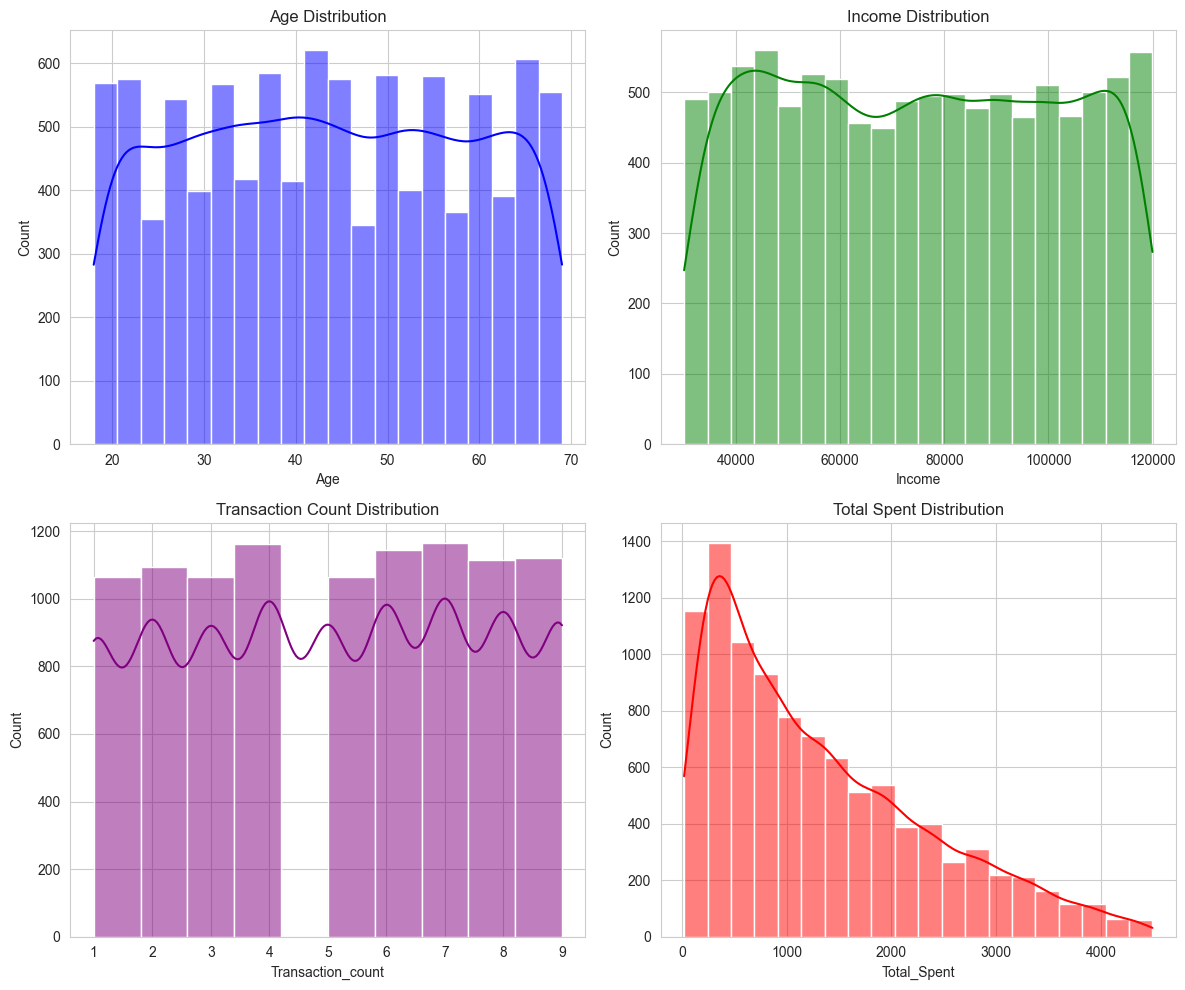

In [99]:
# Set plot style
sns.set_style("whitegrid")

# Create subplots for numerical distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Age Distribution")

# Income distribution
sns.histplot(df['Income'], bins=20, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Income Distribution")

# Transaction count distribution
sns.histplot(df['Transaction_count'], bins=10, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Transaction Count Distribution")

# Total spent distribution
sns.histplot(df['Total_Spent'], bins=20, kde=True, ax=axes[1, 1], color="red")
axes[1, 1].set_title("Total Spent Distribution")

plt.tight_layout()
plt.show()

C:\Users\Surface\AppData\Local\Temp\ipykernel_1340\1890946990.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Total_Spent", data=df, ax=axes[0], palette="coolwarm")
C:\Users\Surface\AppData\Local\Temp\ipykernel_1340\1890946990.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Location", y="Total_Spent", data=df, ax=axes[1], palette="viridis")
C:\Users\Surface\AppData\Local\Temp\ipykernel_1340\1890946990.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
C:\Users\Surface\AppData\Local\Temp\ipykernel_1340\1890946990.py:1

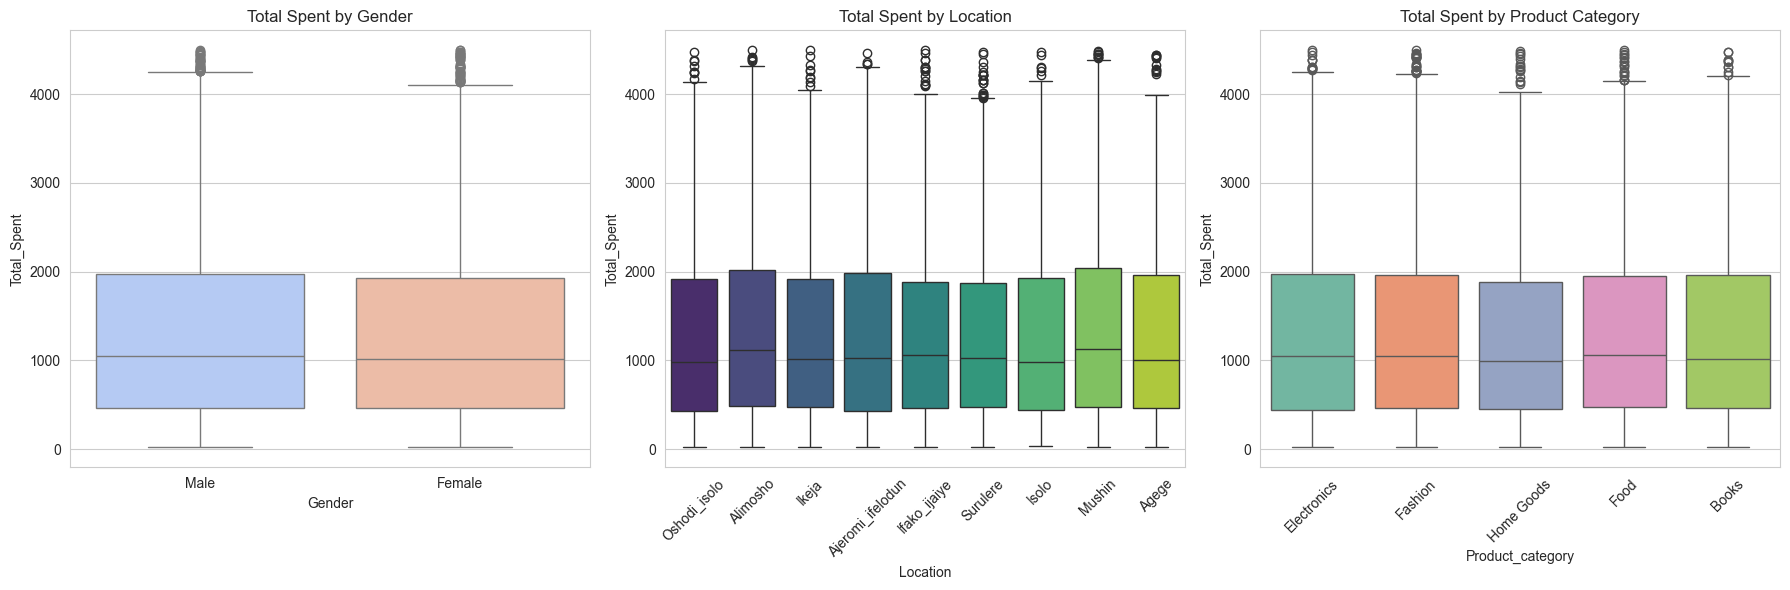

In [100]:
# Create subplots for categorical distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gender vs Total Spent
sns.boxplot(x="Gender", y="Total_Spent", data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Total Spent by Gender")

# Location vs Total Spent
sns.boxplot(x="Location", y="Total_Spent", data=df, ax=axes[1], palette="viridis")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title("Total Spent by Location")

# Product Category vs Total Spent
sns.boxplot(x="Product_category", y="Total_Spent", data=df, ax=axes[2], palette="Set2")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
axes[2].set_title("Total Spent by Product Category")

plt.tight_layout()
plt.show()


## Customer Segmentation

### Encode categorical variables

In [107]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

labels_encoder = {}
original_mappings = {}

for col in ["Gender", "Location", "Product_category"]:
    df[col] = df[col].astype(str)  # Ensure values are treated as categories
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform the column
    labels_encoder[col] = le
    original_mappings[col] = dict(enumerate(le.classes_))  # Store original mappings

# Print original values alongside transformed values
for col, mapping in original_mappings.items():
    print(f"Mapping for {col}:")
    for transformed, original in mapping.items():
        print(f"  {transformed} -> {original}")

Mapping for Gender:
  0 -> Female
  1 -> Male
Mapping for Location:
  0 -> Agege
  1 -> Ajeromi_ifelodun
  2 -> Alimosho
  3 -> Ifako_ijaiye
  4 -> Ikeja
  5 -> Isolo
  6 -> Mushin
  7 -> Oshodi_isolo
  8 -> Surulere
Mapping for Product_category:
  0 -> Books
  1 -> Electronics
  2 -> Fashion
  3 -> Food
  4 -> Home Goods


### Normalize numerical features

In [61]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

df_scaled[:5]

array([[ 0.8356711 ,  1.00440972,  0.35420745,  1.16074092,  1.14837648,
        -1.53845052, -0.91025221, -0.70398788],
       [ 1.7075171 , -0.99560964,  0.5189506 , -0.79686174,  1.14837648,
        -0.78278968, -0.09509938, -0.70398788],
       [ 0.16502033, -0.99560964,  0.39632539, -0.01382067, -0.0187914 ,
         0.53988935,  0.35328844,  0.00689557],
       [-0.77389075, -0.99560964, -0.08378866, -1.18838227, -0.0187914 ,
        -0.37935485, -0.26647084,  0.00689557],
       [ 1.1039314 ,  1.00440972, -0.35586217, -0.40534121, -0.40784736,
         0.69985296,  0.11342587,  1.42866246]])

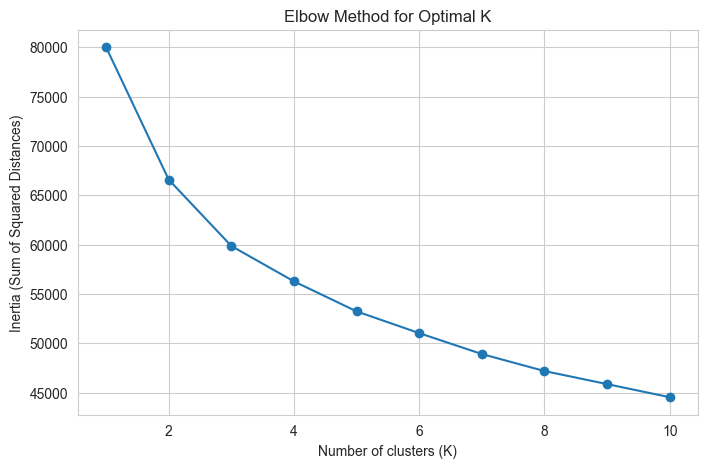

In [62]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

### Visualize segmentation

In [63]:
from sklearn.decomposition import PCA

In [64]:
# Apply K_means clustering with k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned["Cluster"] = kmeans.fit_predict(df_scaled)

In [71]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_cleaned["PCA1"] = df_pca[:, 0]
df_cleaned["PCA2"] = df_pca[:, 1]

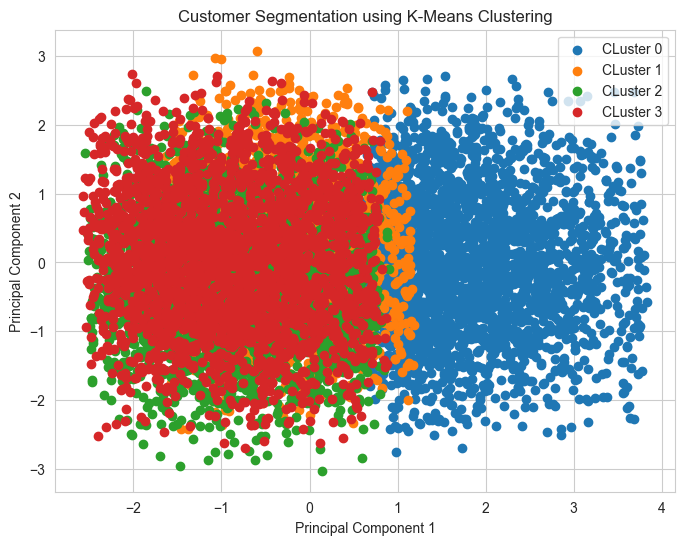

In [72]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = df_cleaned[df_cleaned["Cluster"] == cluster]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"CLuster {cluster}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using K-Means Clustering")
plt.legend()
plt.show()

#### Classify customers into high-value customers, frequent buyers, and potential churn risks

In [70]:
df_cleaned

,Age,Gender,Income,Location,Transaction_count,Average_Transaction_Amount,Total_Spent,Product_category,Cluster,PCA1,PCA2
0,56,1,84235,7,8,47.285409,378.283273,1,2,-0.870250,0.758046
1,69,0,88565,2,8,152.264884,1218.119073,1,3,0.065977,0.645043
2,46,0,85342,4,5,336.016831,1680.084157,2,1,0.488273,0.567909
3,32,0,72723,1,5,208.311691,1041.558454,2,3,-0.387803,-0.906088
4,60,1,65572,3,4,358.239626,1432.958504,4,1,0.248884,-0.022392
...,...,...,...,...,...,...,...,...,...,...,...
9995,55,1,102836,8,4,450.090238,1800.360952,3,1,0.798806,1.935588
9996,51,0,117719,4,7,373.922872,2617.460101,3,0,1.623567,1.546701
9997,57,0,63733,7,4,223.683703,894.734813,2,3,-0.661916,0.849037
9998,64,1,37444,7,2,285.847583,571.695165,1,1,-0.978553,0.168866


In [77]:
# Calculate average values for each cluster
cluster_summary = df_cleaned.groupby("Cluster")
cluster_summary.mean()

,Age,Gender,Income,Location,Transaction_count,Average_Transaction_Amount,Total_Spent,Product_category,PCA1,PCA2
Cluster,,,,,,,,,,
0,43.432166,0.511670,74676.986871,3.978118,7.310722,378.070268,2728.808040,1.930343,1.831009,0.011505
1,43.510963,0.485224,75404.202574,3.983794,2.448046,386.063991,955.041335,2.062917,-0.284057,0.203927
2,44.021901,1.000000,74580.834572,4.163082,4.852953,148.287440,705.028851,2.028940,-0.851053,-0.222498
3,43.201306,0.000000,75139.050711,4.011525,4.952747,147.648931,719.229218,1.956973,-0.863823,0.042083


In [67]:
# Classify clusters based on spending and purchase frequency
classification = {}
for cluster in cluster_summary.index:
    avg_spent = cluster_summary.loc[cluster, "Total_spent"]
    avg_count = cluster_summary.loc[cluster, "Transaction_count"]

    if avg_spent > cluster_summary["Total_spent"].quantile(0.75) and avg_count > cluster_summary["Transaction_count"].quantile(0.75):
        classification[cluster] = "High-Value Customers"
    elif avg_count > cluster_summary["Transaction_count"].quantile(0.75):
        classification[cluster] = "Frequent Buyers"
    elif avg_count < cluster_summary["Transaction_count"].quantile(0.25):
        classification[cluster] = "Potential Churn Risk"
    else:
        classification[cluster] = "Regular Customers"

# Assign classification labels to clusters
df_cleaned["Customer_Segment"] = df_cleaned["Cluster"].map(classification)

# Display cluster summary with classifications
cluster_summary["Segment"] = cluster_summary.index.map(classification)
cluster_summary

KeyError: "['Total_spent', 'Avg_transaction_amount'] not in index"